In [50]:
from funcs.notebook import *
rotper =  4.862 # martioli
orbper =  8.463 # exoplanet.eu

# AU Mic flare waiting times

## Get data

In [51]:
aumic1 = pd.read_csv("../results/2021_02_18_AUMic_flares_1.csv")
aumic1 = aumic1[aumic1.final==1]
aumic27 = pd.read_csv("../results/2021_02_11_AUMic_flares_27.csv")
aumic27 = aumic27[aumic27.final==1]
aumic = pd.concat([aumic1,aumic27])


In [52]:
aumic.shape[0]

215

## map flare start time to orbital phase

In [53]:
phases = []
for j, row in aumic.iterrows():
    try:
        lc = pd.read_csv(f"../results/observedtimes/AU Mic_{row.qcs}_0_TESS.csv")
        phases.append(lc.phase[np.argmin(np.abs(lc.time-row.tstart))])
    except Exception as e:
        print(e)
        phases.append(np.nan)

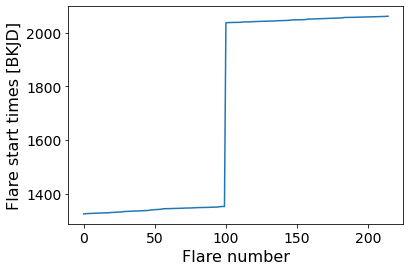

In [54]:
aumic = aumic.sort_values(by="tstart", ascending=True)
plt.plot(aumic.tstart.values)
plt.ylabel("Flare start times [BKJD]")
plt.xlabel("Flare number");

## make a table with waiting time vs. phase

In [55]:
wt = pd.DataFrame({"dt" : np.diff(aumic.tstart),
                   "phase" : phases[1:],
                   "ed_rec":aumic.ed_rec[1:]})

## Bin by phase and plot average waiting time as a function of orbital phase

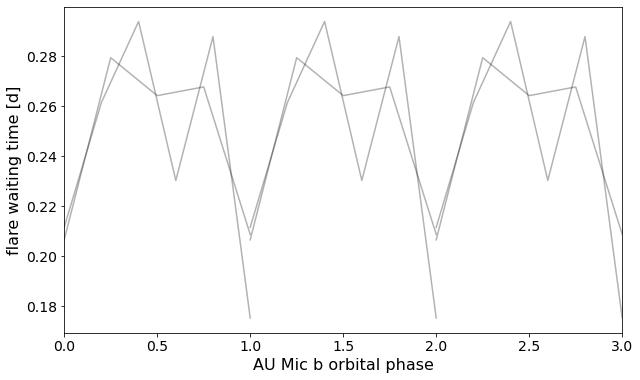

In [21]:
plt.figure(figsize=(10,6))
for bins in np.arange(5,7):
    # bin by phase
    wt['phasebin'] = pd.cut(wt['phase'], np.linspace(0,1, bins+1))
    wt2 = wt[(wt.dt<50) & (wt.dt>0)] #remove outliers
    val = wt2.groupby("phasebin").dt.mean()

    plt.plot(np.linspace(0,1, bins), val, c="k", alpha=.3)
    plt.plot(np.linspace(1,2, bins), val, c="k", alpha=.3)
    plt.plot(np.linspace(2,3, bins), val, c="k", alpha=.3)
plt.xlim(0,3)
plt.ylabel("flare waiting time [d]")
plt.xlabel("AU Mic b orbital phase");

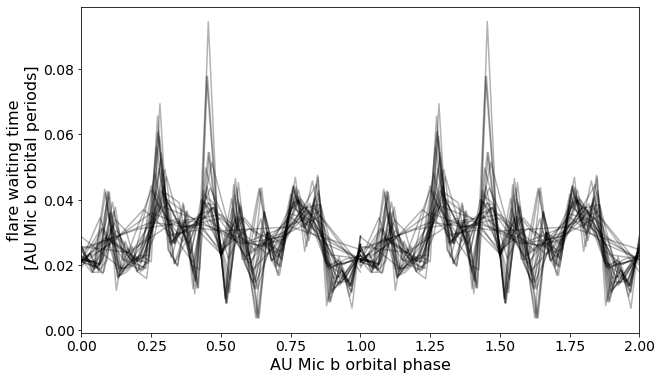

In [22]:

plt.figure(figsize=(10,6))
for bins in np.arange(5,35):
    # bin by phase
    wt['phasebin'] = pd.cut(wt['phase'], np.linspace(0,1, bins+1))
    wt2 = wt[(wt.dt<50)] #remove outlier from sector jump
    val = wt2.groupby("phasebin").dt.mean()

    plt.plot(np.linspace(0,1, bins), val/orbper, c="k", alpha=.3)
    plt.plot(np.linspace(1,2, bins), val/orbper, c="k", alpha=.3)
#     plt.plot(np.linspace(2,3, bins), val/orbper, c="k", alpha=.3)
plt.xlim(0,2)
plt.ylabel("flare waiting time\n [AU Mic b orbital periods]")
plt.xlabel("AU Mic b orbital phase");
# plt.ylim(0.,0.06)

## Explore energies

Text(0.5, 0, 'AU Mic orbital phase')

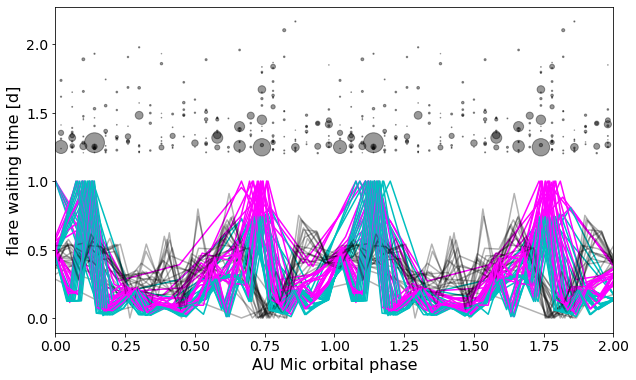

In [23]:

aumicphases = pd.DataFrame()


plt.figure(figsize=(10,6))
for bins in np.arange(5,26):
    aumicphases = pd.DataFrame()
    for qcs in [1,27]:
        lc = pd.read_csv(f"../results/observedtimes/AU Mic_{qcs}_0_TESS.csv")
        cts, _ = np.histogram(lc.phase.values, bins=bins)
        aumicphases[qcs] = cts
    counts = aumicphases.sum(axis=1).values
    # bin by phase
    wt['phasebin'] = pd.cut(wt['phase'], np.linspace(0,1, bins+1))
    wt2 = wt[(wt.dt<1) & (wt.dt>0)] #remove outliers
    val = wt2.groupby("phasebin").dt.mean()# / counts
    val = val / np.max(val)
    esum = wt2.groupby("phasebin").ed_rec.sum()  / counts
    esumn = esum / np.max(esum)
    
    emax = wt2.groupby("phasebin").ed_rec.max()  / counts
    emaxn = emax / np.max(emax)
    if bins == 25:
        for l, g in wt2.groupby("phasebin"):
    #         print(l.mid)
            plt.scatter([l.mid] * len(g.dt),g.dt+1.2, c="k", alpha=.4, s=g.ed_rec*4)
            plt.scatter([l.mid + 1.] * len(g.dt),g.dt+1.2, c="k", alpha=.4, s=g.ed_rec*4)

    plt.plot(np.linspace(0,2, 2*bins), 1-np.append(val,val), c="k", 
             alpha=.3, label="1 - mean flare waiting time")
    
    plt.plot(np.linspace(0,2, 2*bins), np.append(esumn,esumn), 
             c="magenta", label="normalized ED sum" )
    plt.plot(np.linspace(0,2, 2*bins), np.append(emaxn,emaxn),
             c="c", label="maximum normalized ED")
plt.xlim(0,2)
plt.ylabel("flare waiting time [d]")
plt.xlabel("AU Mic orbital phase")
# plt.legend(loc=(1,0), frameon=False);

(0.013889242950199332, 0.16402880286783555)
KstestResult(statistic=0.09169566258737671, pvalue=0.9901732709990562)
(0.007407592140680208, 0.17586133191617465)
KstestResult(statistic=0.17521923632881814, pvalue=0.29926475411882714)
(0.008796512990102201, 0.22735014083548322)
KstestResult(statistic=0.15233209502370149, pvalue=0.742667618752725)
(0.013888373580130065, 0.22833562257990117)
KstestResult(statistic=0.13533029128951146, pvalue=0.8744143885667962)
(0.04236209007012803, 0.19813184648484952)
KstestResult(statistic=0.2687786692698078, pvalue=0.22030307916856373)
(0.010185192149947397, 0.17615592727852344)
KstestResult(statistic=0.1435037320330062, pvalue=0.7526986645665622)
(0.010185413809722377, 0.15127823379225447)
KstestResult(statistic=0.12753662960675338, pvalue=0.941831107448472)
(0.022916828459983662, 0.26749688033361785)
KstestResult(statistic=0.147187915390675, pvalue=0.3793099017306417)
(0.0027777797699855, 0.22629768086148078)
KstestResult(statistic=0.1568380981528819, 

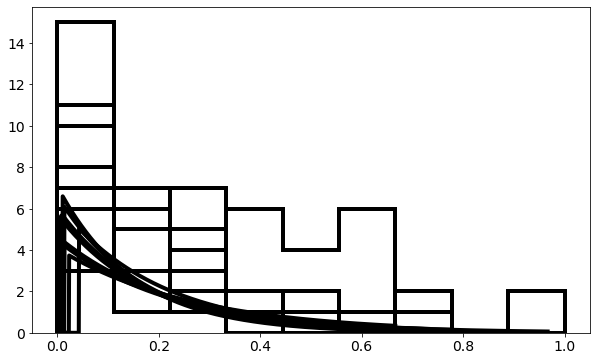

In [24]:
import scipy.stats as st

orbper =  8.462991 # exoplanet.eu

aumicphases = pd.DataFrame()

expargs = {}
plt.figure(figsize=(10,6))
for bins in np.arange(5,26):
    aumicphases = pd.DataFrame()
    for qcs in [1,27]:
        lc = pd.read_csv(f"../results/observedtimes/AU Mic_{qcs}_0_TESS.csv")
        cts, _ = np.histogram(lc.phase.values, bins=bins)
        aumicphases[qcs] = cts
    counts = aumicphases.sum(axis=1).values
    # bin by phase
    wt['phasebin'] = pd.cut(wt['phase'], np.linspace(0,1, bins+1))
    wt2 = wt[(wt.dt<1) & (wt.dt>0)] #remove outliers
    val = wt2.groupby("phasebin").dt.mean()# / counts
    val = val / np.max(val)
    esum = wt2.groupby("phasebin").ed_rec.sum()  / counts
    esumn = esum / np.max(esum)
    
    emax = wt2.groupby("phasebin").ed_rec.max()  / counts
    emaxn = emax / np.max(emax)
    colors = ["k","r","g","c","magenta","orange","grey","navy","yellow","brown"]
    if bins == 10:
        for l, g in wt2.groupby("phasebin"):
    #         print(l.mid)
#             plt.scatter([l.mid] * len(g.dt),g.dt+1.2, c="k", alpha=.4, s=g.ed_rec*4)
#             plt.scatter([l.mid + 1.] * len(g.dt),g.dt+1.2, c="k", alpha=.4, s=g.ed_rec*4)
            
            smean = g.dt.mean()
            rate = 1. / smean

            smax = g.dt.max()
            days = np.linspace(0., smax, 1000)
            # bin size: interval between two
            # consecutive values in `days`
            dt = smax / 999.
            
            dist_exp = st.expon.pdf(days, scale=1. / rate)
            
            dist = st.expon
            args = dist.fit(g.dt)
            
            print(args)
            expargs[l.mid] = args
            print(st.kstest(g.dt, dist.cdf, args))
            nbins=np.linspace(0,1,10)
            c = "k"
            plt.hist(g.dt, nbins, color=c, histtype="step", linewidth=4)
            fitted = st.expon.pdf(days, loc=args[0], scale=args[1])
            plt.plot(days, fitted, c=c, linewidth=4)


#     plt.plot(np.linspace(0,2, 2*bins), 1-np.append(val,val), c="k", 
#              alpha=.3, label="1 - mean flare waiting time")
    
#     plt.plot(np.linspace(0,2, 2*bins), np.append(esumn,esumn), 
#              c="magenta", label="normalized ED sum" )
#     plt.plot(np.linspace(0,2, 2*bins), np.append(emaxn,emaxn),
#              c="c", label="maximum normalized ED")
# plt.xlim(0,2)
# plt.ylabel("flare waiting time [d]")
# plt.xlabel("AU Mic orbital phase")
# plt.legend(loc=(1,0), frameon=False);

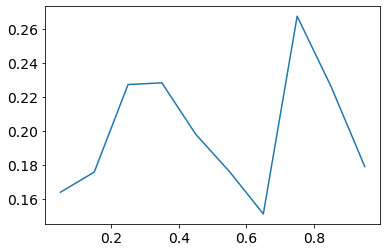

In [25]:
data = pd.DataFrame(expargs).T
plt.plot(data.index,data[1])

# Beat Period

In [30]:
beat_per = 2 / ( 1/rotper - 1/orbper ) 
beat_per = 2 / ( 1/rotper + 1/orbper )

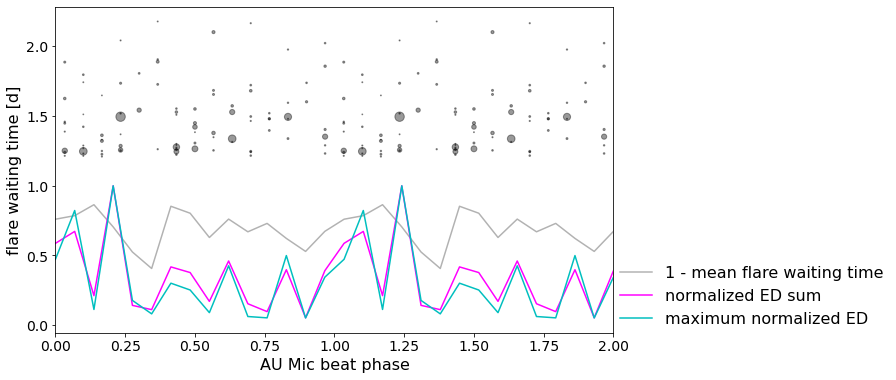

In [33]:
wt = pd.DataFrame({"dt" : np.diff(aumic1.tstart),
                   "beatphase" : (aumic1.tstart % beat_per / beat_per).values[1:],
                   "ed_rec" : aumic1.ed_rec.iloc[1:]})


plt.figure(figsize=(10,6))
for bins in np.arange(15,16):
    
    lc = pd.read_csv(f"../results/observedtimes/AU Mic_1_0_TESS.csv")
    counts, b = np.histogram(lc.phase.values, bins=bins)
    
    # bin by phase
    wt['phasebin'] = pd.cut(wt['beatphase'], np.linspace(0,1, bins+1))
    wt2 = wt[(wt.dt<1) & (wt.dt>0)] #remove outliers
    val = wt2.groupby("phasebin").dt.mean() 
    esum = wt2.groupby("phasebin").ed_rec.sum()  / counts
    esumn = esum / np.max(esum)
    
    emax = wt2.groupby("phasebin").ed_rec.max()  / counts
    emaxn = emax / np.max(emax)
    for l, g in wt2.groupby("phasebin"):
#         print(l.mid)
        plt.scatter([l.mid] * len(g.dt),g.dt+1.2, c="k", alpha=.4, s=g.ed_rec*4)
        plt.scatter([l.mid + 1.] * len(g.dt),g.dt+1.2, c="k", alpha=.4, s=g.ed_rec*4)

    plt.plot(np.linspace(0,2, 2*bins), 1-np.append(val,val), c="k", 
             alpha=.3, label="1 - mean flare waiting time")
    
    plt.plot(np.linspace(0,2, 2*bins), np.append(esumn,esumn), 
             c="magenta", label="normalized ED sum" )
    plt.plot(np.linspace(0,2, 2*bins), np.append(emaxn,emaxn),
             c="c", label="maximum normalized ED")
plt.xlim(0,2)
plt.ylabel("flare waiting time [d]")
plt.xlabel("AU Mic beat phase")
plt.legend(loc=(1,0), frameon=False);

Text(0.5, 0, 'AU Mic beat phase')

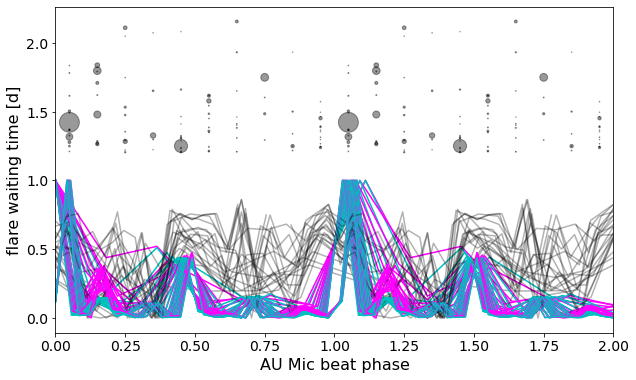

In [36]:
wt = pd.DataFrame({"dt" : np.diff(aumic27.tstart),
                   "beatphase" : (aumic27.tstart % beat_per / beat_per).values[1:],
                   "ed_rec" : aumic27.ed_rec.iloc[1:]})


plt.figure(figsize=(10,6))
for bins in np.arange(5,26):
    
    lc = pd.read_csv(f"../results/observedtimes/AU Mic_27_0_TESS.csv")
    counts, b = np.histogram(lc.phase.values, bins=bins)
    # bin by phase
    wt['phasebin'] = pd.cut(wt['beatphase'], np.linspace(0,1, bins+1))
    wt2 = wt[(wt.dt<1) & (wt.dt>0)] #remove outliers
    val = wt2.groupby("phasebin").dt.mean() / counts
    val = val / np.max(val)
    esum = wt2.groupby("phasebin").ed_rec.sum() / counts
    esumn = esum / np.max(esum)
    
    emax = wt2.groupby("phasebin").ed_rec.max()  / counts
    emaxn = emax / np.max(emax)
    if bins == 10:
        for l, g in wt2.groupby("phasebin"):
    #         print(l.mid)
            plt.scatter([l.mid] * len(g.dt),g.dt+1.2, c="k", alpha=.4, s=g.ed_rec*4)
            plt.scatter([l.mid + 1.] * len(g.dt),g.dt+1.2, c="k", alpha=.4, s=g.ed_rec*4)

    plt.plot(np.linspace(0,2, 2*bins), 1-np.append(val,val), c="k", 
             alpha=.3, label="1 - mean flare waiting time")
    
    plt.plot(np.linspace(0,2, 2*bins), np.append(esumn,esumn), 
             c="magenta", label="normalized ED sum" )
    plt.plot(np.linspace(0,2, 2*bins), np.append(emaxn,emaxn),
             c="c", label="maximum normalized ED")
plt.xlim(0,2)
plt.ylabel("flare waiting time [d]")
plt.xlabel("AU Mic beat phase")
# plt.legend(loc=(1,0), frameon=False);

# Rotational modulation

In [37]:
import lightkurve as lk



In [38]:
lcs = lk.search_lightcurve("AU Mic", mission="TESS", sector=27)
lc27 = lcs[0].download()
lcs = lk.search_lightcurve("AU Mic", mission="TESS", sector=1)
lc1 = lcs[0].download()

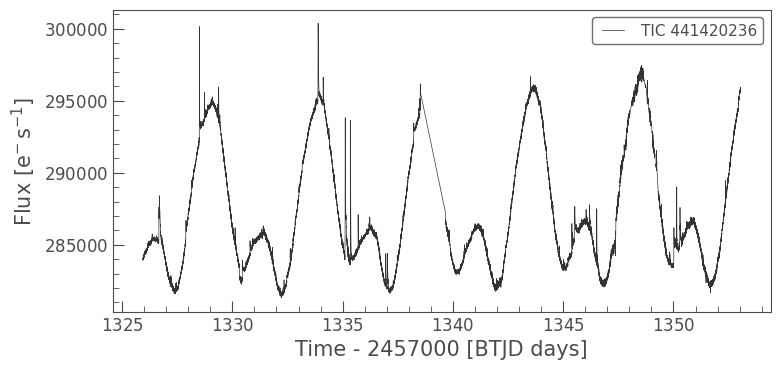

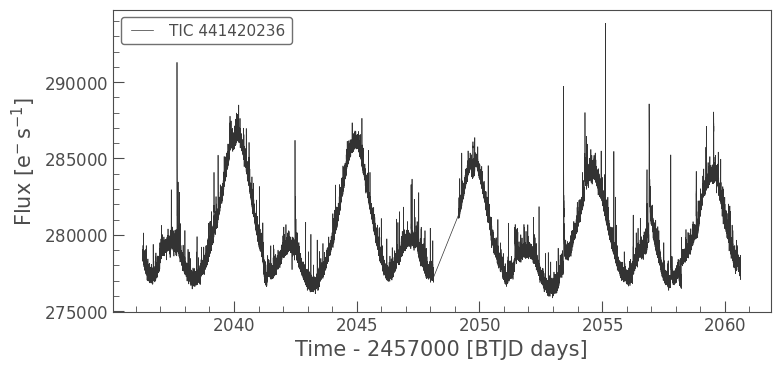

In [39]:
lc1.plot()
lc27.plot()

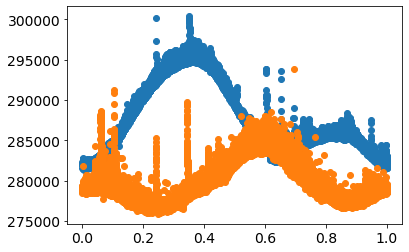

In [40]:
folded1 = lc1.fold(period=rotper, epoch_time=0, epoch_phase=0, wrap_phase=rotper)
plt.scatter(folded1.time.value/rotper, folded1.flux.value)
folded27 = lc27.fold(period=rotper, epoch_time=0, epoch_phase=0, wrap_phase=rotper)
plt.scatter(folded27.time.value/rotper, folded27.flux.value)
# ax.set_xlim(0,2)
# folded.time.max() -folded.time.min()
# folded.time / rotper
# folded.flux.value

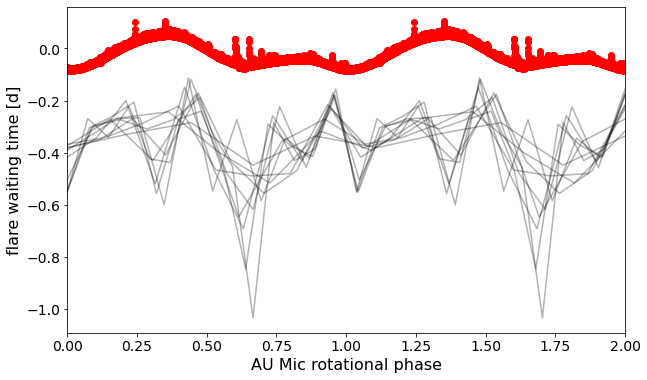

In [44]:
wt = pd.DataFrame({"dt" : np.diff(aumic1.tstart),
                   "rotphase" : (aumic1.tstart % rotper / rotper).values[1:]})

plt.figure(figsize=(10,6))
for bins in np.arange(5,15):
    # bin by phase
    wt['phasebin'] = pd.cut(wt['rotphase'], np.linspace(0,1, bins+1))
    wt2 = wt[(wt.dt<4) & (wt.dt>0)] #remove outliers
    
    val = wt2.groupby("phasebin").dt.mean()

    plt.plot(np.linspace(0,2, 2*bins), -np.append(val,val), c="k", alpha=.3)
#     plt.plot(np.linspace(1,2, bins), -val, c="k", alpha=.3)
#     plt.plot(np.linspace(2,3, bins), val, c="k", alpha=.3)
plt.xlim(0,2)
plt.ylabel("flare waiting time [d]")
plt.xlabel("AU Mic rotational phase")
plt.scatter(folded1.time.value/rotper, folded1.flux.value/1e5 - 2.9, c="r")
plt.scatter(folded1.time.value/rotper+1, folded1.flux.value/1e5 - 2.9, c="r");
# plt.ylim(-.2,.6)

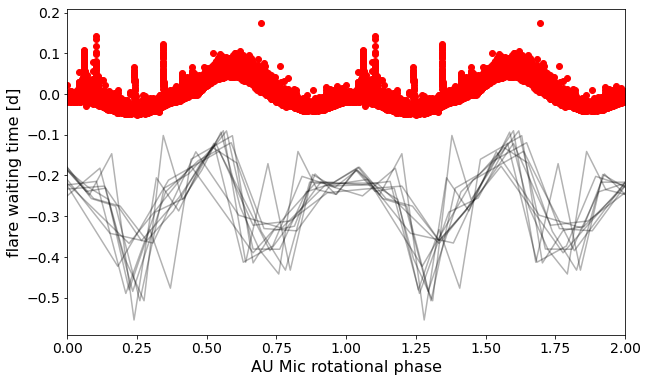

In [46]:
wt = pd.DataFrame({"dt" : np.diff(aumic27.tstart),
                   "rotphase" : (aumic27.tstart % rotper / rotper).values[1:]})

plt.figure(figsize=(10,6))
for bins in np.arange(5,16):
    # bin by phase
    wt['phasebin'] = pd.cut(wt['rotphase'], np.linspace(0,1, bins+1))
    wt2 = wt[(wt.dt<1) & (wt.dt>0)] #remove outliers
    val = wt2.groupby("phasebin").dt.mean()

    plt.plot(np.linspace(0,2, 2*bins), -np.append(val,val), c="k", alpha=.3)
plt.xlim(0,2)
plt.ylabel("flare waiting time [d]")
plt.xlabel("AU Mic rotational phase")
plt.scatter(folded27.time.value/rotper, folded27.flux.value/8e4 - 3.5, c="r")
plt.scatter(folded27.time.value/rotper+1, folded27.flux.value/8e4 - 3.5, c="r");
# plt.ylim(-.3,0.2);

# Explore energies

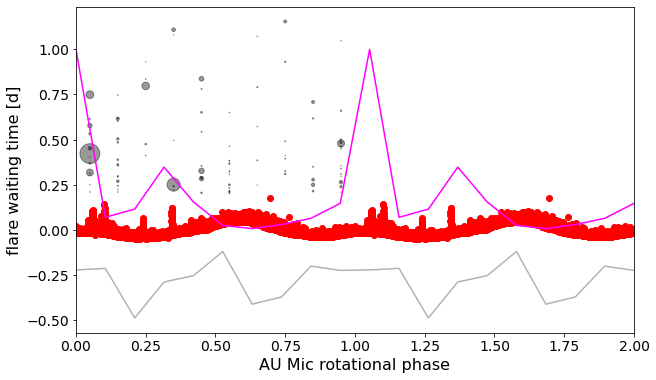

In [47]:
wt = pd.DataFrame({"dt" : np.diff(aumic27.tstart),
                   "rotphase" : (aumic27.tstart % rotper / rotper).values[1:],
                   "ed_rec":aumic27.ed_rec.iloc[1:]})

plt.figure(figsize=(10,6))
for bins in np.arange(10,11):
    # bin by phase
    wt['phasebin'] = pd.cut(wt['rotphase'], np.linspace(0,1, bins+1))
    wt2 = wt[(wt.dt<1) & (wt.dt>0)] #remove outliers
    val = wt2.groupby("phasebin").dt.mean()
    esum = wt2.groupby("phasebin").ed_rec.sum()
    esumn = esum / np.max(esum)
    for l, g in wt2.groupby("phasebin"):
#         print(l.mid)
        plt.scatter([l.mid] * len(g.dt),g.dt+.2, c="k", alpha=.4, s=g.ed_rec*4)

    plt.plot(np.linspace(0,2, 2*bins), -np.append(val,val), c="k", alpha=.3)
    
    plt.plot(np.linspace(0,2, 2*bins), np.append(esumn,esumn), c="magenta")
plt.xlim(0,2)
plt.ylabel("flare waiting time [d]")
plt.xlabel("AU Mic rotational phase")
plt.scatter(folded27.time.value/rotper, folded27.flux.value/8e4 - 3.5, c="r", zorder=-10)
plt.scatter(folded27.time.value/rotper+1, folded27.flux.value/8e4 - 3.5, c="r", zorder=-10);
# plt.ylim(-.3,0.2);

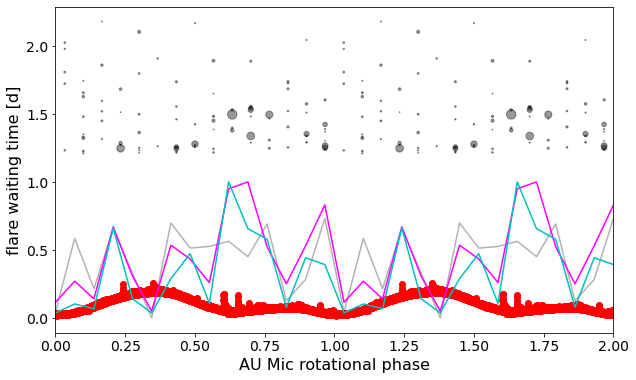

In [48]:
wt = pd.DataFrame({"dt" : np.diff(aumic1.tstart),
                   "rotphase" : (aumic1.tstart % rotper / rotper).values[1:],
                   "ed_rec":aumic1.ed_rec.iloc[1:]})
plt.figure(figsize=(10,6))
for bins in np.arange(15,16):
    
    lc = pd.read_csv(f"../results/observedtimes/AU Mic_27_0_TESS.csv")
    counts, b = np.histogram(lc.phase.values, bins=bins)
    # bin by phase
    wt['phasebin'] = pd.cut(wt['rotphase'], np.linspace(0,1, bins+1))
    wt2 = wt[(wt.dt<1) & (wt.dt>0)] #remove outliers
    val = wt2.groupby("phasebin").dt.mean() / counts
    val = val / np.max(val)
    esum = wt2.groupby("phasebin").ed_rec.sum() / counts
    esumn = esum / np.max(esum)
    
    emax = wt2.groupby("phasebin").ed_rec.max()  / counts
    emaxn = emax / np.max(emax)
   
    for l, g in wt2.groupby("phasebin"):
#         print(l.mid)
        plt.scatter([l.mid] * len(g.dt),g.dt+1.2, c="k", alpha=.4, s=g.ed_rec*4)
        plt.scatter([l.mid + 1.] * len(g.dt),g.dt+1.2, c="k", alpha=.4, s=g.ed_rec*4)

    plt.plot(np.linspace(0,2, 2*bins), 1-np.append(val,val), c="k", 
             alpha=.3, label="1 - mean flare waiting time")
    
    plt.plot(np.linspace(0,2, 2*bins), np.append(esumn,esumn), 
             c="magenta", label="normalized ED sum" )
    plt.plot(np.linspace(0,2, 2*bins), np.append(emaxn,emaxn),
             c="c", label="maximum normalized ED")
plt.xlim(0,2)
plt.ylabel("flare waiting time [d]")
plt.xlabel("AU Mic rotational phase")
plt.scatter(folded1.time.value/rotper, folded1.flux.value/8e4 - 3.5, c="r", zorder=-10)
plt.scatter(folded1.time.value/rotper+1, folded1.flux.value/8e4 - 3.5, c="r", zorder=-10);
# plt.ylim(-.3,0.2);

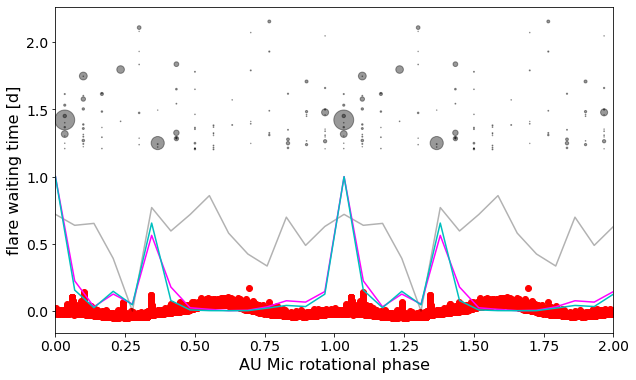

In [49]:
wt = pd.DataFrame({"dt" : np.diff(aumic27.tstart),
                   "rotphase" : (aumic27.tstart % rotper / rotper).values[1:],
                   "ed_rec":aumic27.ed_rec.iloc[1:]})
plt.figure(figsize=(10,6))
for bins in np.arange(15,16):
    
    lc = pd.read_csv(f"../results/observedtimes/AU Mic_27_0_TESS.csv")
    counts, b = np.histogram(lc.phase.values, bins=bins)
    # bin by phase
    wt['phasebin'] = pd.cut(wt['rotphase'], np.linspace(0,1, bins+1))
    wt2 = wt[(wt.dt<1) & (wt.dt>0)] #remove outliers
    val = wt2.groupby("phasebin").dt.mean() / counts
    val = val / np.max(val)
    esum = wt2.groupby("phasebin").ed_rec.sum() / counts
    esumn = esum / np.max(esum)
    
    emax = wt2.groupby("phasebin").ed_rec.max()  / counts
    emaxn = emax / np.max(emax)
   
    for l, g in wt2.groupby("phasebin"):
        plt.scatter([l.mid] * len(g.dt),g.dt+1.2, c="k", alpha=.4, s=g.ed_rec*4)
        plt.scatter([l.mid + 1.] * len(g.dt),g.dt+1.2, c="k", alpha=.4, s=g.ed_rec*4)

    plt.plot(np.linspace(0,2, 2*bins), 1-np.append(val,val), c="k", 
             alpha=.3, label="1 - mean flare waiting time")
    
    plt.plot(np.linspace(0,2, 2*bins), np.append(esumn,esumn), 
             c="magenta", label="normalized ED sum" )
    plt.plot(np.linspace(0,2, 2*bins), np.append(emaxn,emaxn),
             c="c", label="maximum normalized ED")
plt.xlim(0,2)
plt.ylabel("flare waiting time [d]")
plt.xlabel("AU Mic rotational phase")
plt.scatter(folded27.time.value/rotper, folded27.flux.value/8e4 - 3.5, c="r", zorder=-10)
plt.scatter(folded27.time.value/rotper+1, folded27.flux.value/8e4 - 3.5, c="r", zorder=-10);
# plt.ylim(-.3,0.2);